In [3]:
#basic imports
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import warnings
from collections import Counter

warnings.filterwarnings("ignore")

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
%matplotlib inline
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Pre-Processing

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor


# Metrics
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
%matplotlib inline

In [ ]:
import matplotlib

In [5]:
import tsfresh

In [6]:
#import pyeeg

In [7]:
#Load the Data
df = pd.read_csv("data/Seizure_data.csv")
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


## Exploratory Data Analysis

In [8]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [9]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [11]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [12]:
df['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [13]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]


In [14]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [15]:
y

,y
0,4
1,1
2,5
3,5
4,5
...,...
11495,2
11496,1
11497,5
11498,3


In [16]:
#make a data frame for the epileptic waves and the non epileptic waves
import matplotlib.pyplot as plt

df_pos = df[df["y"] == 1]
df_pos = df_pos.drop(columns = ["y"])
df_neg = df[df["y"] > 1]
df_neg = df_neg.drop(columns = ["y"])



In [17]:
print(len(df_pos))

2300


In [18]:
print(len(df_neg))

9200


In [19]:
df_pos.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,168,164,150,146,152,157,156,154,143,129
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40
11,X21.V1.724,-167,-230,-280,-315,-338,-369,-405,-392,-298,...,415,423,434,416,374,319,268,215,165,103
20,X23.V1.964,410,451,491,541,581,641,736,757,692,...,409,415,428,463,510,562,607,667,748,763
22,X11.V1.134,-264,-189,-117,-45,20,70,111,143,161,...,-227,-231,-221,-248,-321,-444,-530,-548,-536,-486


In [20]:
df_neg.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55


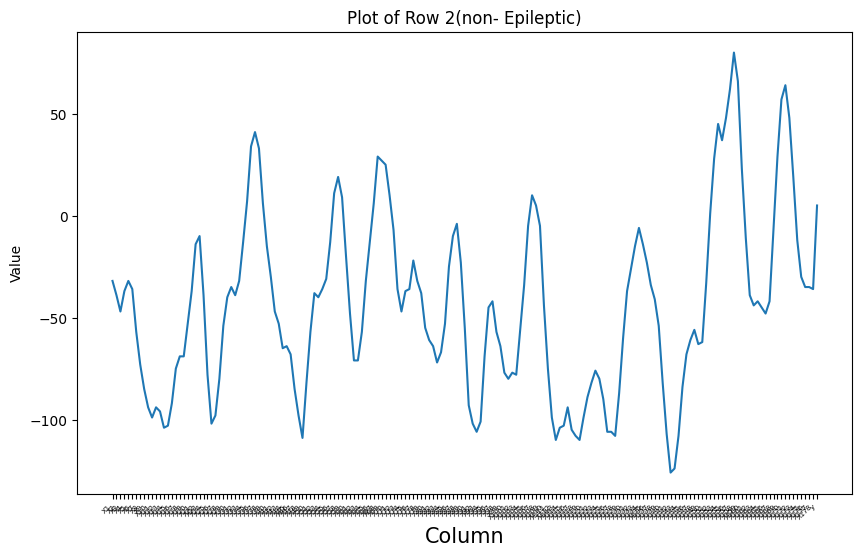

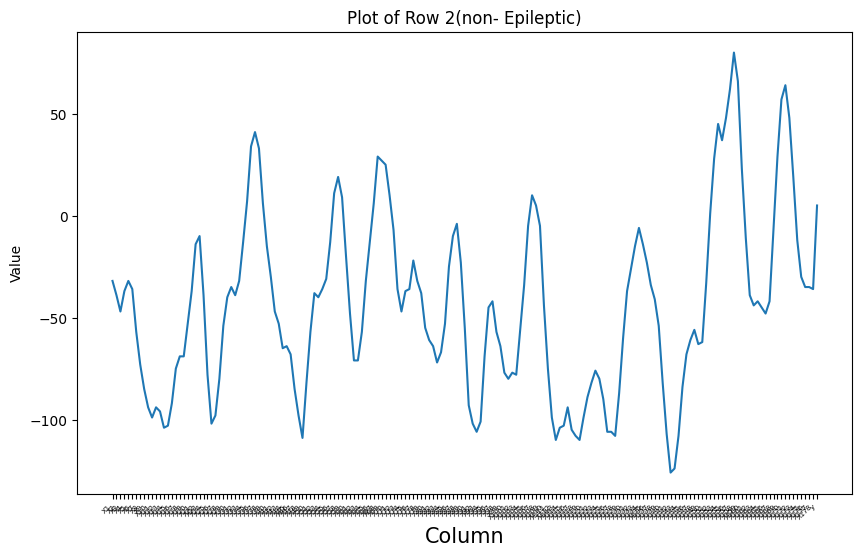

In [ ]:
row_index = 2  # Index of the row you want to plot
row_to_plot = df.iloc[row_index]
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize = 5)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Column', fontsize = 15)
plt.ylabel('Value')
plt.title(f'Plot of Row {row_index}(non- Epileptic)')
plt.show()

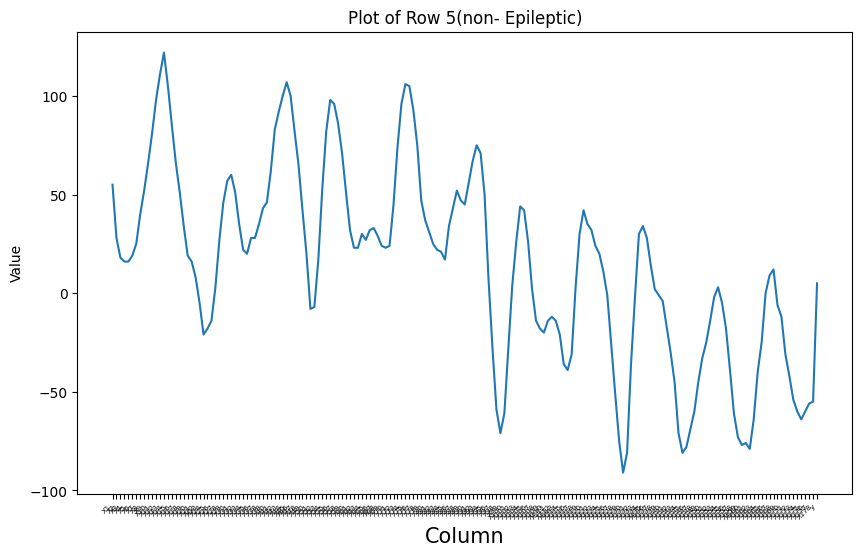

In [22]:
row_index = 5  # Index of the row you want to plot
row_to_plot = df.iloc[row_index]
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize = 5)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Column', fontsize = 15)
plt.ylabel('Value')
plt.title(f'Plot of Row {row_index}(non- Epileptic)')
plt.show()

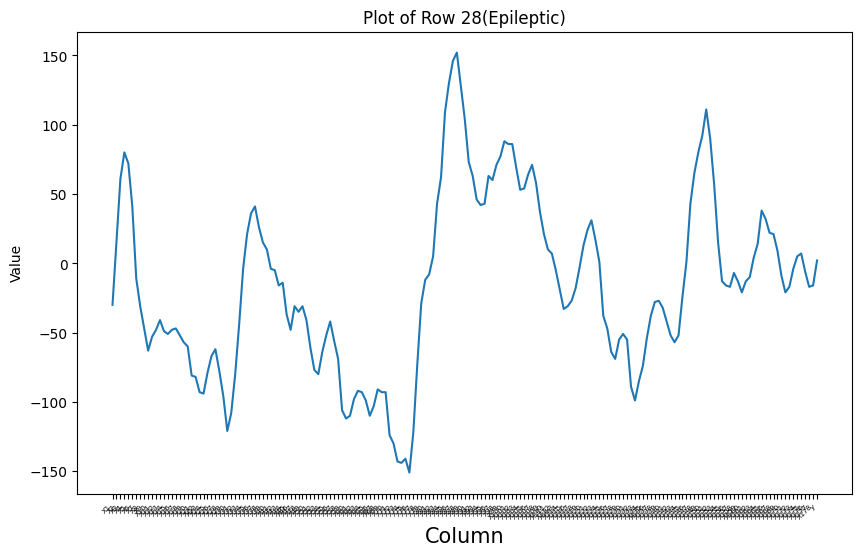

In [23]:
row_index = 28  # Index of the row you want to plot
row_to_plot = df.iloc[row_index]
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize = 5)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Column', fontsize = 15)
plt.ylabel('Value')
plt.title(f'Plot of Row {row_index}(Epileptic)')
plt.show()

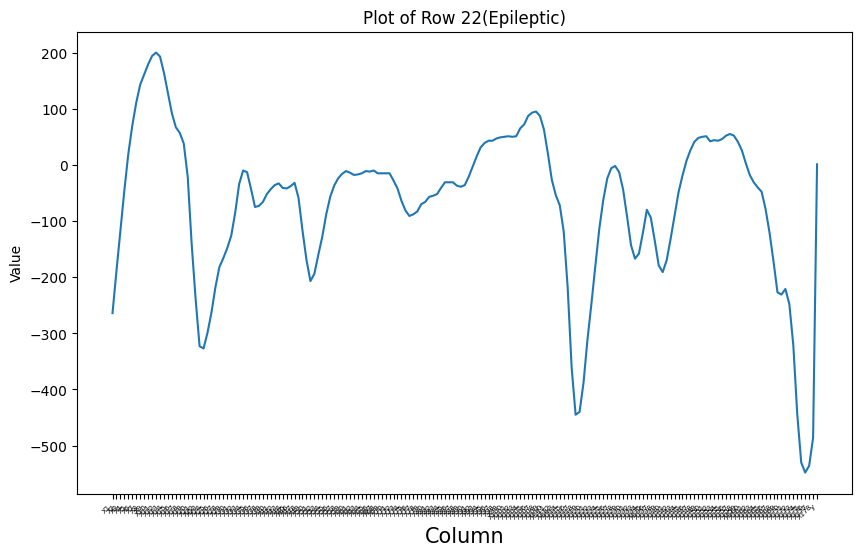

In [24]:
row_index = 22  # Index of the row you want to plot
row_to_plot = df.iloc[row_index]
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize = 5)
# Plot the row data
plt.plot(row_to_plot.index[1:], row_to_plot.values[1:])
plt.xlabel('Column', fontsize = 15)
plt.ylabel('Value')
plt.title(f'Plot of Row {row_index}(Epileptic)')
plt.show()

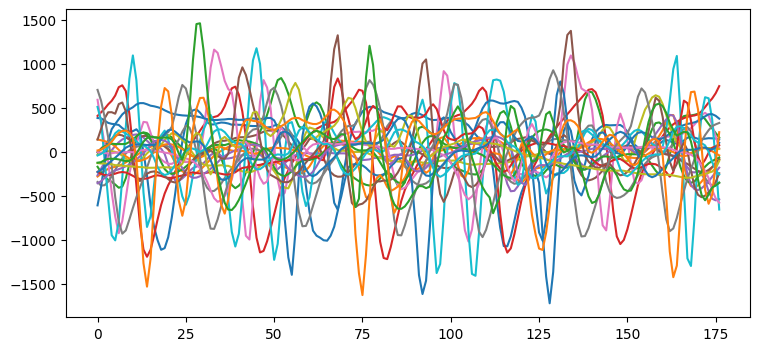

In [25]:
plt.figure(figsize=(30,4))
plt.subplot(131)
[plt.plot(df_pos.values[i][1:-1]) for i in range(23)];

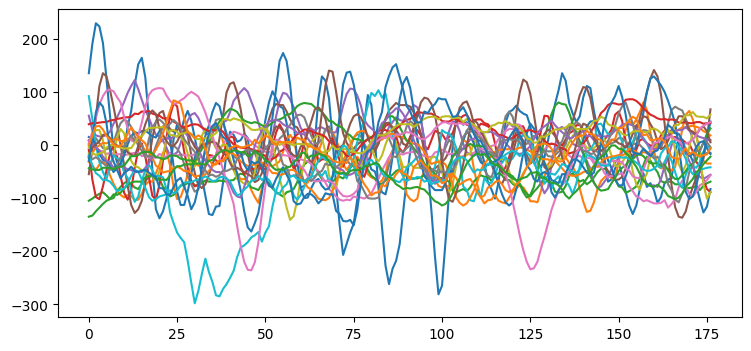

In [26]:
plt.figure(figsize=(30,4))
plt.subplot(131)
[plt.plot(df_neg.values[i][1:-1]) for i in range(23)];

In [27]:
dfb = df.copy()
y= dfb[['Unnamed','y']]
X = dfb.drop(columns = ['y'])

In [31]:
# Remove X from column names to more easily sort by numbered order
X.columns = X.columns.str.replace('X', '')
# Add new column of binary classificaiton of seizure
y['binary_y'] = np.where(y['y'] == 1, 1, 0)
y_ = y[['Unnamed','binary_y']]

In [32]:
X_ = X.melt(id_vars= 'Unnamed', 
        var_name="Time", 
        value_name="Value")

In [33]:
X_['Time'] = pd.to_numeric(X_['Time']) #
X_.sort_values(['Unnamed','Time'], inplace=True)
y_.sort_values(['Unnamed'], inplace=True)
y_ = y_.set_index('Unnamed')

In [34]:
y_ = y_.reset_index()


In [35]:
df_melt = pd.merge(X_, y_, how='right')
df_melt


,Unnamed,Time,Value,binary_y
0,X1.V1,1,12,0
1,X1.V1,2,22,0
2,X1.V1,3,35,0
3,X1.V1,4,45,0
4,X1.V1,5,69,0
...,...,...,...,...
2046995,X9.V14,174,42,1
2046996,X9.V14,175,394,1
2046997,X9.V14,176,580,1
2046998,X9.V14,177,562,1


In [36]:
y_

,Unnamed,binary_y
0,X1.V1,0
1,X1.V1.1,0
2,X1.V1.10,0
3,X1.V1.101,0
4,X1.V1.102,0
...,...,...
11495,X9.V1.994,1
11496,X9.V11,0
11497,X9.V12,0
11498,X9.V13,0


In [37]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features

In [38]:
from tsfresh.feature_extraction import ComprehensiveFCParameters
settings = ComprehensiveFCParameters()
# Set here the options of the settings object as shown in the paragraphs below
# ...
from tsfresh.feature_extraction import extract_features

In [39]:
y_

,Unnamed,binary_y
0,X1.V1,0
1,X1.V1.1,0
2,X1.V1.10,0
3,X1.V1.101,0
4,X1.V1.102,0
...,...,...
11495,X9.V1.994,1
11496,X9.V11,0
11497,X9.V12,0
11498,X9.V13,0


In [40]:
#df_X_features = extract_relevant_features(df_melt, y_['binary_y'], column_id = "Unnamed", column_sort='Time', column_value="Value", default_fc_parameters=settings)

In [41]:
df_X_features = pd.read_csv('Data/extracted_features.csv')
#df_X_features.to_csv('Data/extracted_features.csv')

In [42]:
# Setup X and y dateframes to begin modelling
X_for_modeling = df_X_features
y_for_modeling = y_['binary_y']

In [43]:
# Now you can start you Model classification using the X and Y from above

In [44]:
X_for_modeling

,Unnamed: 0,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4",...,Value__index_mass_quantile__q_0.3,"Value__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.6",Value__autocorrelation__lag_1,Value__partial_autocorrelation__lag_1,Value__index_mass_quantile__q_0.2,"Value__fft_coefficient__attr_""real""__coeff_37",Value__symmetry_looking__r_0.15000000000000002,"Value__fft_coefficient__attr_""angle""__coeff_75","Value__fft_coefficient__attr_""angle""__coeff_67",Value__first_location_of_maximum
0,X1.V1,51.007234,31.764922,7.151515,82.908173,18.198400,4.960000,42.025600,81.433594,36.649730,...,0.264045,0.030303,0.931450,0.931450,0.168539,-50.226949,1.0,0.304850,40.090555,0.033708
1,X1.V1.1,34.101047,130.020031,13.564516,313.170916,36.620499,9.894737,127.036011,227.759810,114.689553,...,0.168539,0.919355,0.936497,0.936497,0.123596,-42.419438,1.0,-90.993816,46.038087,0.713483
2,X1.V1.10,49.015052,47.664399,8.714286,123.391282,19.700000,6.000000,54.490000,122.763377,53.490638,...,0.365169,0.460317,0.970434,0.970434,0.264045,21.754051,1.0,169.609464,179.245104,0.252809
3,X1.V1.101,195.903449,541.369722,28.383333,1339.960833,91.200617,15.277778,323.496914,1180.743484,598.716037,...,0.258427,2.650000,0.906939,0.906939,0.191011,-9.786756,1.0,157.488121,146.042618,0.314607
4,X1.V1.102,13.422923,5.546485,3.238095,15.773747,2.355372,2.090909,6.429752,16.860969,5.870405,...,0.157303,-0.507937,0.905405,0.905405,0.117978,54.038435,1.0,-42.996532,-172.186013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X9.V1.994,299.343498,1472.605917,51.384615,4098.191716,1164.737240,49.043478,2920.858223,1996.112222,2266.409600,...,0.353933,-3.846154,0.966713,0.966713,0.230337,117.295530,1.0,20.425142,-61.865002,0.359551
11496,X9.V11,54.302423,56.764828,11.096774,178.700312,64.338843,11.545455,195.776860,110.938889,86.105900,...,0.264045,1.096774,0.946817,0.946817,0.207865,-49.948844,1.0,-128.386673,158.315126,0.544944
11497,X9.V12,36.967458,26.227755,6.171429,64.314286,6.800000,3.000000,15.728889,94.902344,26.124183,...,0.247191,0.000000,0.982084,0.982084,0.162921,59.336896,1.0,10.515178,38.680461,0.617978
11498,X9.V13,40.532085,9.818115,3.796875,23.695068,7.155325,3.192308,17.332840,18.420898,9.365748,...,0.213483,-0.734375,0.961505,0.961505,0.117978,47.873480,1.0,26.931311,-64.349919,0.011236


In [45]:
X_for_modeling.columns


Index(['Unnamed: 0', 'Value__fft_coefficient__attr_"abs"__coeff_57',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6',
       'Value__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.6',
       'Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4',
       ...
       'Value__index_mass_quantile__q_0.3',
       'Value__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6',
       'Value__autocorrelation__lag_1',
       'Value__partial_autocorrelation__lag_1',
       'Value__index_mass_quantile__q_0.2',
       'Value__fft_coefficient__attr_"real"__coeff_37',
      

In [46]:
import seaborn as sns
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## First Logistic Regression Model 

In [47]:
#imports for Logistic Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
#train split the data
X = X_for_modeling.drop(columns = ["Unnamed: 0"])
y = y_for_modeling


X

,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",...,Value__index_mass_quantile__q_0.3,"Value__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.6",Value__autocorrelation__lag_1,Value__partial_autocorrelation__lag_1,Value__index_mass_quantile__q_0.2,"Value__fft_coefficient__attr_""real""__coeff_37",Value__symmetry_looking__r_0.15000000000000002,"Value__fft_coefficient__attr_""angle""__coeff_75","Value__fft_coefficient__attr_""angle""__coeff_67",Value__first_location_of_maximum
0,51.007234,31.764922,7.151515,82.908173,18.198400,4.960000,42.025600,81.433594,36.649730,95.252729,...,0.264045,0.030303,0.931450,0.931450,0.168539,-50.226949,1.0,0.304850,40.090555,0.033708
1,34.101047,130.020031,13.564516,313.170916,36.620499,9.894737,127.036011,227.759810,114.689553,267.984483,...,0.168539,0.919355,0.936497,0.936497,0.123596,-42.419438,1.0,-90.993816,46.038087,0.713483
2,49.015052,47.664399,8.714286,123.391282,19.700000,6.000000,54.490000,122.763377,53.490638,146.832075,...,0.365169,0.460317,0.970434,0.970434,0.264045,21.754051,1.0,169.609464,179.245104,0.252809
3,195.903449,541.369722,28.383333,1339.960833,91.200617,15.277778,323.496914,1180.743484,598.716037,1579.549371,...,0.258427,2.650000,0.906939,0.906939,0.191011,-9.786756,1.0,157.488121,146.042618,0.314607
4,13.422923,5.546485,3.238095,15.773747,2.355372,2.090909,6.429752,16.860969,5.870405,14.936183,...,0.157303,-0.507937,0.905405,0.905405,0.117978,54.038435,1.0,-42.996532,-172.186013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,299.343498,1472.605917,51.384615,4098.191716,1164.737240,49.043478,2920.858223,1996.112222,2266.409600,6143.945600,...,0.353933,-3.846154,0.966713,0.966713,0.230337,117.295530,1.0,20.425142,-61.865002,0.359551
11496,54.302423,56.764828,11.096774,178.700312,64.338843,11.545455,195.776860,110.938889,86.105900,235.167500,...,0.264045,1.096774,0.946817,0.946817,0.207865,-49.948844,1.0,-128.386673,158.315126,0.544944
11497,36.967458,26.227755,6.171429,64.314286,6.800000,3.000000,15.728889,94.902344,26.124183,66.225682,...,0.247191,0.000000,0.982084,0.982084,0.162921,59.336896,1.0,10.515178,38.680461,0.617978
11498,40.532085,9.818115,3.796875,23.695068,7.155325,3.192308,17.332840,18.420898,9.365748,22.036663,...,0.213483,-0.734375,0.961505,0.961505,0.117978,47.873480,1.0,26.931311,-64.349919,0.011236


In [49]:

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = .3, 
                                                    random_state =42)


In [50]:

X.rename(columns={"Unnamed: 0": 'Segment'}, inplace=True)

In [51]:
model = LogisticRegression(random_state=42)

In [52]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [53]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
print(y_hat_train)
print(y_hat_test)

[1 1 0 ... 0 1 1]
[0 1 0 ... 0 0 0]


In [54]:


accuracy_score(y_test, model.predict(X_test))

0.9571014492753623

In [55]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2763
           1       0.95      0.83      0.89       687

    accuracy                           0.96      3450
   macro avg       0.95      0.91      0.93      3450
weighted avg       0.96      0.96      0.96      3450



In [56]:
tsfresh.feature_selection.relevance.calculate_relevance_table(X, y, ml_task='auto')

,feature,type,p_value,relevant
feature,,,,
"Value__fft_coefficient__attr_""abs""__coeff_57","Value__fft_coefficient__attr_""abs""__coeff_57",real,0.000000,True
"Value__fft_coefficient__attr_""abs""__coeff_86","Value__fft_coefficient__attr_""abs""__coeff_86",real,0.000000,True
"Value__fft_coefficient__attr_""abs""__coeff_85","Value__fft_coefficient__attr_""abs""__coeff_85",real,0.000000,True
"Value__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""max""","Value__agg_linear_trend__attr_""intercept""__chu...",real,0.000000,True
"Value__fft_coefficient__attr_""abs""__coeff_10","Value__fft_coefficient__attr_""abs""__coeff_10",real,0.000000,True
...,...,...,...,...
"Value__fft_coefficient__attr_""real""__coeff_37","Value__fft_coefficient__attr_""real""__coeff_37",real,0.002915,True
Value__symmetry_looking__r_0.15000000000000002,Value__symmetry_looking__r_0.15000000000000002,binary,0.003054,True
"Value__fft_coefficient__attr_""angle""__coeff_75","Value__fft_coefficient__attr_""angle""__coeff_75",real,0.003216,True


In [57]:

pd.set_option('display.max_columns', None)
X_for_modeling.head()

,Unnamed: 0,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_30","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8","Value__fft_coefficient__attr_""abs""__coeff_29","Value__fft_coefficient__attr_""abs""__coeff_15","Value__fft_coefficient__attr_""abs""__coeff_16","Value__fft_coefficient__attr_""abs""__coeff_17","Value__fft_coefficient__attr_""abs""__coeff_18","Value__fft_coefficient__attr_""abs""__coeff_19","Value__fft_coefficient__attr_""abs""__coeff_20","Value__fft_coefficient__attr_""abs""__coeff_21","Value__fft_coefficient__attr_""abs""__coeff_22","Value__fft_coefficient__attr_""abs""__coeff_23","Value__fft_coefficient__attr_""abs""__coeff_24","Value__fft_coefficient__attr_""abs""__coeff_25","Value__fft_coefficient__attr_""abs""__coeff_26","Value__fft_coefficient__attr_""abs""__coeff_27","Value__fft_coefficient__attr_""abs""__coeff_56","Value__fft_coefficient__attr_""abs""__coeff_28","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_14","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0","Value__fft_coefficient__attr_""abs""__coeff_31","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",Value__ar_coefficient__coeff_9__k_10,Value__ar_coefficient__coeff_8__k_10,Value__ar_coefficient__coeff_6__k_10,Value__ar_coefficient__coeff_4__k_10,Value__ar_coefficient__coeff_2__k_10,Value__ar_coefficient__coeff_1__k_10,"Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2"

In [58]:
df2 = pd.concat([df_X_features, y_], axis=1, join="inner")
df2

,Unnamed: 0,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_30","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8","Value__fft_coefficient__attr_""abs""__coeff_29","Value__fft_coefficient__attr_""abs""__coeff_15","Value__fft_coefficient__attr_""abs""__coeff_16","Value__fft_coefficient__attr_""abs""__coeff_17","Value__fft_coefficient__attr_""abs""__coeff_18","Value__fft_coefficient__attr_""abs""__coeff_19","Value__fft_coefficient__attr_""abs""__coeff_20","Value__fft_coefficient__attr_""abs""__coeff_21","Value__fft_coefficient__attr_""abs""__coeff_22","Value__fft_coefficient__attr_""abs""__coeff_23","Value__fft_coefficient__attr_""abs""__coeff_24","Value__fft_coefficient__attr_""abs""__coeff_25","Value__fft_coefficient__attr_""abs""__coeff_26","Value__fft_coefficient__attr_""abs""__coeff_27","Value__fft_coefficient__attr_""abs""__coeff_56","Value__fft_coefficient__attr_""abs""__coeff_28","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_14","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0","Value__fft_coefficient__attr_""abs""__coeff_31","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",Value__ar_coefficient__coeff_9__k_10,Value__ar_coefficient__coeff_8__k_10,Value__ar_coefficient__coeff_6__k_10,Value__ar_coefficient__coeff_4__k_10,Value__ar_coefficient__coeff_2__k_10,Value__ar_coefficient__coeff_1__k_10,"Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2"

In [59]:
#df2 = df2.reset_index()


In [60]:
#df2 = df2.drop(columns = ["level_0"])


In [61]:
df2 

,Unnamed: 0,"Value__fft_coefficient__attr_""abs""__coeff_57","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_30","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8","Value__fft_coefficient__attr_""abs""__coeff_29","Value__fft_coefficient__attr_""abs""__coeff_15","Value__fft_coefficient__attr_""abs""__coeff_16","Value__fft_coefficient__attr_""abs""__coeff_17","Value__fft_coefficient__attr_""abs""__coeff_18","Value__fft_coefficient__attr_""abs""__coeff_19","Value__fft_coefficient__attr_""abs""__coeff_20","Value__fft_coefficient__attr_""abs""__coeff_21","Value__fft_coefficient__attr_""abs""__coeff_22","Value__fft_coefficient__attr_""abs""__coeff_23","Value__fft_coefficient__attr_""abs""__coeff_24","Value__fft_coefficient__attr_""abs""__coeff_25","Value__fft_coefficient__attr_""abs""__coeff_26","Value__fft_coefficient__attr_""abs""__coeff_27","Value__fft_coefficient__attr_""abs""__coeff_56","Value__fft_coefficient__attr_""abs""__coeff_28","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","Value__fft_coefficient__attr_""abs""__coeff_14","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","Value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0","Value__fft_coefficient__attr_""abs""__coeff_31","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.4__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",Value__ar_coefficient__coeff_9__k_10,Value__ar_coefficient__coeff_8__k_10,Value__ar_coefficient__coeff_6__k_10,Value__ar_coefficient__coeff_4__k_10,Value__ar_coefficient__coeff_2__k_10,Value__ar_coefficient__coeff_1__k_10,"Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","Value__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2","Value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2"

## EDA of PCA data

In [203]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)



In [ ]:
import numpy as np

cov_mat = np.cov(X_train_std)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)


In [ ]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

In [208]:
def get_variance(X, n):
    scaler = StandardScaler()
    pca = PCA(n_components=n)

    pca.fit(scaler.fit_transform(X))

    return pca.explained_variance_ratio_.cumsum()[-1:]

In [209]:
for i in range(1,14):
    print('Components:\t', i, '=\t', get_variance(X, i), 
          '\tCumulative Variance')

Components:	 1 =	 [0.33575733] 	Cumulative Variance
Components:	 2 =	 [0.3986254] 	Cumulative Variance
Components:	 3 =	 [0.44244011] 	Cumulative Variance
Components:	 4 =	 [0.47859182] 	Cumulative Variance
Components:	 5 =	 [0.50893005] 	Cumulative Variance
Components:	 6 =	 [0.53553731] 	Cumulative Variance
Components:	 7 =	 [0.5576963] 	Cumulative Variance
Components:	 8 =	 [0.57845832] 	Cumulative Variance
Components:	 9 =	 [0.59603948] 	Cumulative Variance
Components:	 10 =	 [0.60997734] 	Cumulative Variance
Components:	 11 =	 [0.62196142] 	Cumulative Variance
Components:	 12 =	 [0.63350931] 	Cumulative Variance
Components:	 13 =	 [0.64403465] 	Cumulative Variance


In [220]:
def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new



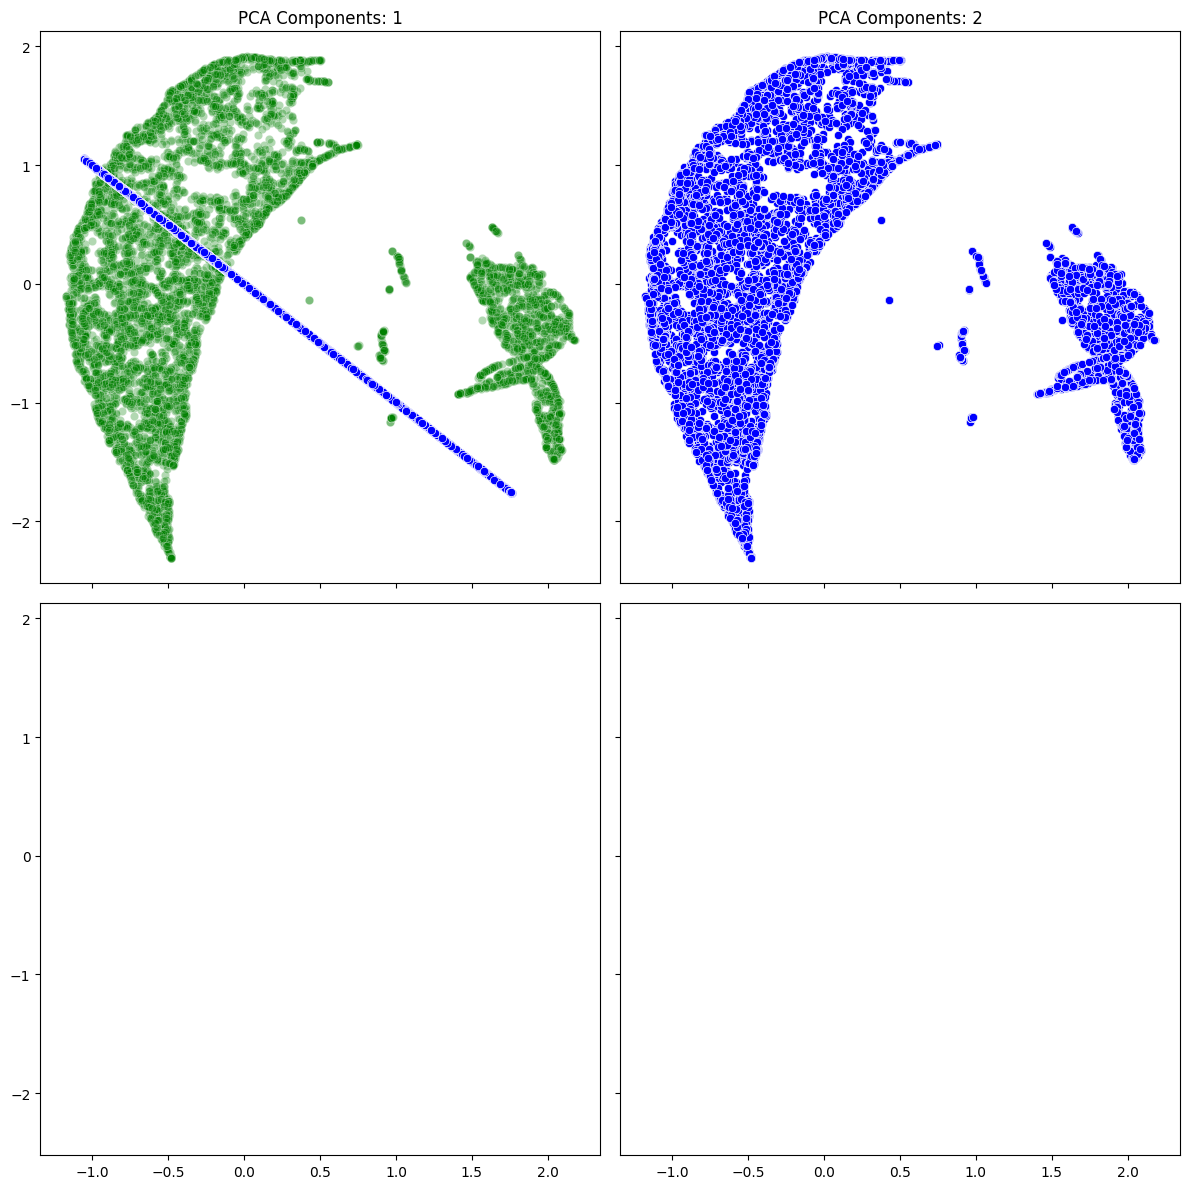

In [229]:
rows = 2
cols = 2
comps = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0], 
                                 y=X_scaled[:, 1], 
                                 ax=axes[row, col], 
                                 color='green', 
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0], 
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='blue')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.savefig('pcavisualize_2.png', dpi=300)

In [258]:
from sklearn.pipeline import FeatureUnion
def create_pipe(clf, do_pca=False, n=2):

    scaler = StandardScaler()
    pca = PCA(n_components=n)

    if do_pca == True:
        combined_features = FeatureUnion([("scaler", scaler), 
                                          ("pca", pca)])
    else:
        combined_features = FeatureUnion([("scaler", scaler)])

    pipeline = Pipeline([("features", combined_features), 
                         ("clf", clf)])


    return pipeline

In [268]:
models_3 = {'KNeighbors' : KNeighborsClassifier(),
          'RandomForest' : RandomForestClassifier(random_state=42),
          'LogisticReg' : LogisticRegression(random_state=42),
          }


def run_models(with_pca):
    for name, model, in models.items():
        clf = model
        pipeline = create_pipe(clf, do_pca = with_pca, n=2)
        scores = cross_val_score(pipeline, X_train, 
                                 y_train, 
                                 scoring='accuracy', 
                                 cv=3, n_jobs=1, 
                                 error_score='raise')
        print(name, ': Mean Accuracy: %.3f and Standard Deviation: \
             (%.3f)' % (np.mean(scores), np.std(scores)))

print(68 * '-')
print('Without PCA')
print(68 * '-')
run_models(False)
print(68 * '-')
print('With PCA')
print(68 * '-')
run_models(True)
print(68 * '-')

--------------------------------------------------------------------
Without PCA
--------------------------------------------------------------------


<IPython.core.display.Javascript object>

KNeighbors : Mean Accuracy: 0.996 and Standard Deviation:              (0.001)


<IPython.core.display.Javascript object>

RandomForest : Mean Accuracy: 0.996 and Standard Deviation:              (0.001)


<IPython.core.display.Javascript object>

LogisticReg : Mean Accuracy: 0.996 and Standard Deviation:              (0.001)
--------------------------------------------------------------------
With PCA
--------------------------------------------------------------------


<IPython.core.display.Javascript object>

KNeighbors : Mean Accuracy: 0.996 and Standard Deviation:              (0.001)


<IPython.core.display.Javascript object>

RandomForest : Mean Accuracy: 0.997 and Standard Deviation:              (0.001)


<IPython.core.display.Javascript object>

LogisticReg : Mean Accuracy: 0.996 and Standard Deviation:              (0.001)
--------------------------------------------------------------------


In [269]:
def fit_and_print(pipeline):

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(metrics.classification_report(y_test, y_pred, digits=3))

    ConfusionMatrixDisplay.from_predictions(y_test, 
                                            y_pred, 
                                            cmap=plt.cm.Greys)

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show; 

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0      0.998     0.999     0.999      1835
           1      0.996     0.994     0.995       465

    accuracy                          0.998      2300
   macro avg      0.997     0.996     0.997      2300
weighted avg      0.998     0.998     0.998      2300



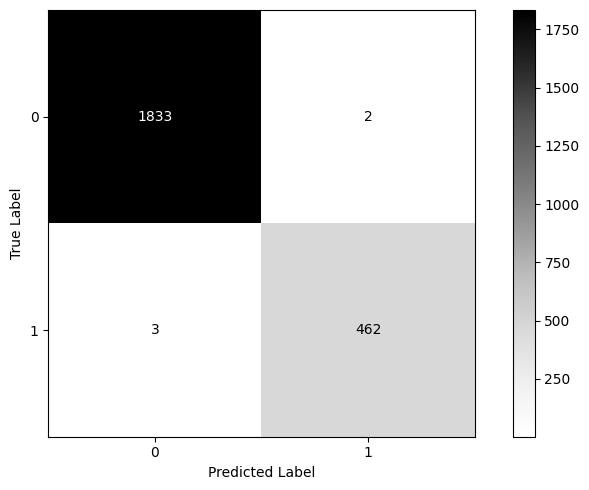

In [270]:
clf = LogisticRegression(C=10, 
                         penalty='l1', 
                         solver='liblinear', 
                         random_state=41)
pipeline = create_pipe(clf, do_pca=True, n=2)
fit_and_print(pipeline)

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0      0.998     0.999     0.999      1835
           1      0.996     0.994     0.995       465

    accuracy                          0.998      2300
   macro avg      0.997     0.996     0.997      2300
weighted avg      0.998     0.998     0.998      2300



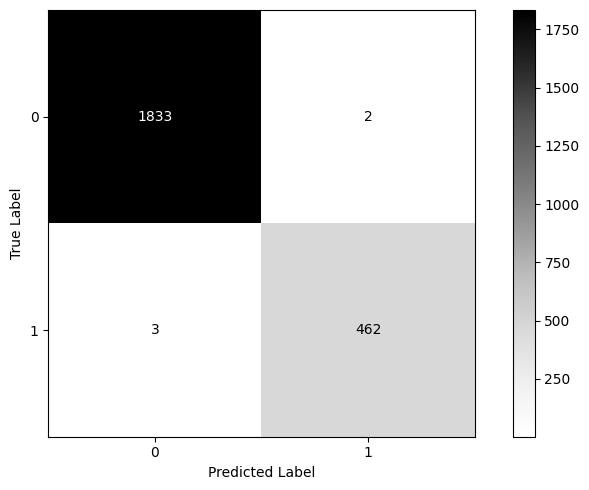

In [271]:
clf = LogisticRegression(C=10, 
                         penalty='l1', 
                         solver='liblinear', 
                         random_state=41)
pipeline = create_pipe(clf, do_pca=False)
fit_and_print(pipeline)

Text(0, 0.5, 'Proportion of Variance Explained')

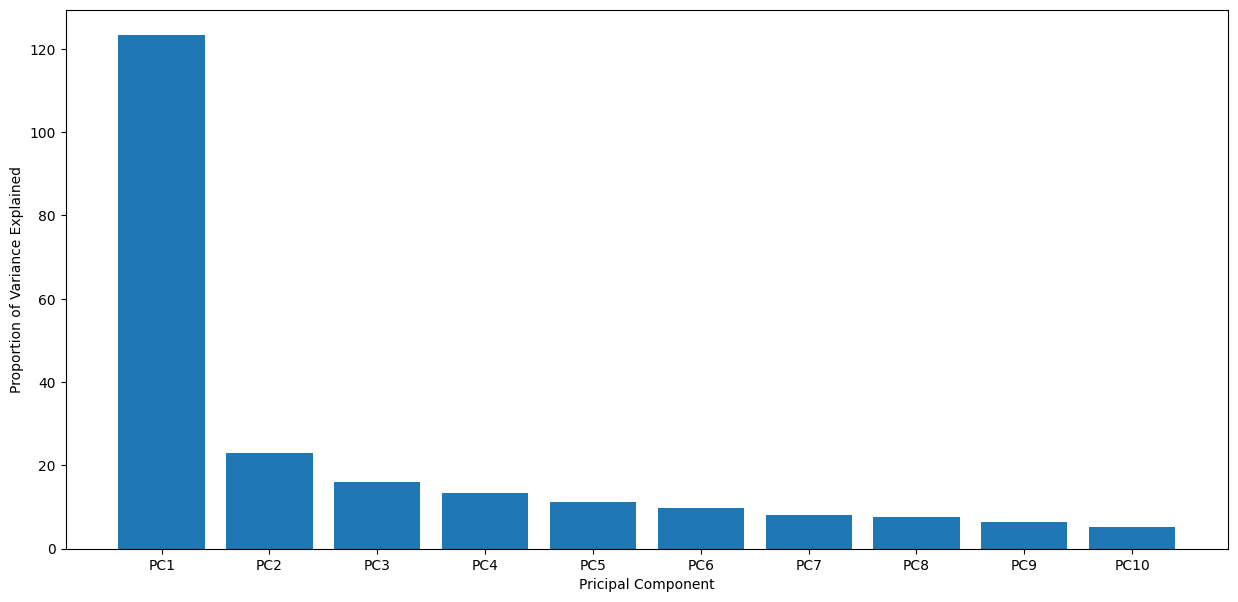

In [272]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')


## Creating a pipeline for first logistic model with standard scaler , PCA 

In [62]:
#X = df_melt.drop(columns = ["binary_y"])
#y = df_melt["binary_y"]

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    random_state =42)
ext_cols = X_train.select_dtypes('float').columns


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from tsfresh.transformers import RelevantFeatureAugmenter
from tsfresh.feature_extraction import extract_features
from sklearn.compose import ColumnTransformer

extract_pipeline = Pipeline([
                    ('extract', RelevantFeatureAugmenter(column_id='Segment', column_sort='Time', column_value= "Value"))])


ct = ColumnTransformer([ 
     ("extpipe", extract_pipeline, ext_cols)])

pipe1 = Pipeline([
        ('preprocess', ct),
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('Log', LogisticRegression(random_state = 42))])


In [64]:
#grid = [{'extract__column_id': "Segment", 
         #'extract__column_sort': "Time", 
         #'extract__column_value': "Value"}]

In [65]:
pipe1.set_params(extract__timeseries_container= df_melt)
pipe1.fit(X_train, y_train)


ValueError: Invalid parameter 'extract' for estimator Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('extpipe',
                                                  Pipeline(steps=[('extract',
                                                                   RelevantFeatureAugmenter(column_id='Segment',
                                                                                            column_sort='Time',
                                                                                            column_value='Value'))]),
                                                  Index(['Value__fft_coefficient__attr_"abs"__coeff_57',
       'Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.6',
       'Value__change_quantiles__f_agg_"mean"__...
       'Value__fft_coefficient__attr_"real"__coeff_37',
       'Value__symmetry_looking__r_0.15000000000000002',
       'Value__fft_coefficient__attr_"angle"__coeff_75',
       'Value__fft_coefficient__attr_"angle"__coeff_67',
       'Value__first_location_of_maximum'],
      dtype='object', length=367))])),
                ('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('Log', LogisticRegression(random_state=42))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
X_.rename(columns={"Unnamed": 'Segment'}, inplace=True)


In [ ]:
pipe1.fit(X_train, y_train)

In [ ]:
pipe1.score(X_train, y_train)

## Logistic Regression Model + PCA + SS

In [99]:
pipe2 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('Log', LogisticRegression(random_state = 42))])

In [100]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('Log', LogisticRegression(random_state=42))])

In [101]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('Log', LogisticRegression(random_state=42))])

In [102]:
pipe2.score(X_train, y_train)

0.9935072463768116

In [103]:
y_pr_trn_1 = pipe2.predict(X_train)
y_pr_tst_1 = pipe2.predict(X_test)

In [104]:
print(classification_report(y_test, y_pr_tst_1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2297
           1       0.96      0.96      0.96       578

    accuracy                           0.99      2875
   macro avg       0.98      0.98      0.98      2875
weighted avg       0.99      0.99      0.99      2875



In [147]:
scores_2 = cross_val_score(pipe2, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_2.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.996195652173913


In [105]:
from sklearn.metrics import roc_curve, auc

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, y_pr_tst_1)

In [107]:
roc_auc_1 = auc(fpr, tpr)

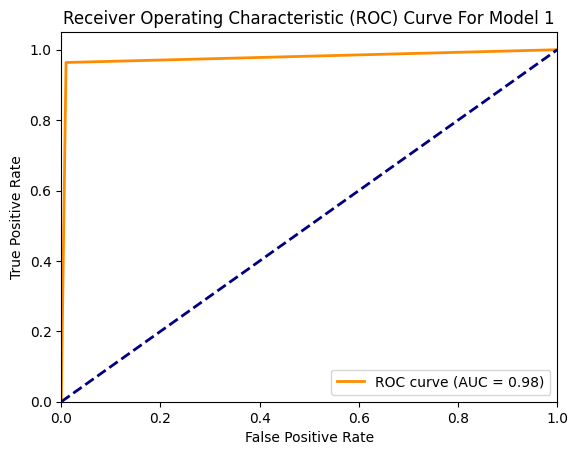

In [108]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Model 1')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression Model + SS + UMAP

In [131]:
import umap


pipe8 = Pipeline([
        ('scale', StandardScaler()),
        ('Log', LogisticRegression(random_state = 42))])


In [136]:
umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X, y)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)

In [138]:
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [139]:
y_pred = logreg_model.predict(X_test)

In [140]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1835
           1       1.00      0.99      0.99       465

    accuracy                           1.00      2300
   macro avg       1.00      1.00      1.00      2300
weighted avg       1.00      1.00      1.00      2300

Confusion Matrix:
[[1833    2]
 [   3  462]]


In [146]:
scores_umap = cross_val_score(logreg_model, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_umap.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.996195652173913


## Logistic Regression + SS + PCA + SMOTE 

In [ ]:

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


pipe3 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('smote', SMOTE(random_state = 42)),
        ('Log', LogisticRegression(random_state = 42))])

In [ ]:
pipe3.fit(X_train, y_train)

In [ ]:
pipe3.score(X_train, y_train)

In [ ]:
y_pr_trn_2 = pipe3.predict(X_train)
y_pr_tst_2 = pipe3.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pr_tst_2))

## Logistic Regression + SS+ PCA + L2 regularization

In [82]:
pipe7 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('Log', LogisticRegression(penalty='l2', C=1.0))])

In [83]:
pipe7.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('Log', LogisticRegression())])

In [84]:
pipe7.score(X_train, y_train)

0.9935072463768116

In [85]:
y_pr_trn_7 = pipe7.predict(X_train)
y_pr_tst_7 = pipe7.predict(X_test)

In [88]:
print("train score is", pipe7.score(X_train,y_train))
print("test score is", pipe7.score(X_test,y_test))
print("train predicted score is", y_pr_trn_7)
print("test predicted score is", y_pr_tst_7)

train score is 0.9935072463768116
test score is 0.9850434782608696
train predicted score is [1 1 0 ... 0 1 1]
test predicted score is [0 1 0 ... 0 0 1]


In [87]:
print(classification_report(y_test, y_pr_tst_7))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2297
           1       0.96      0.96      0.96       578

    accuracy                           0.99      2875
   macro avg       0.98      0.98      0.98      2875
weighted avg       0.99      0.99      0.99      2875



In [145]:
scores_7 = cross_val_score(pipe7, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_7.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.996195652173913


## Decision Tree Classifier + SS + PCA 

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

pipe4 = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=0.95)),
        ('dtc', DecisionTreeClassifier())])

In [96]:
grid = [{'dtc__max_depth': [4, 5, 6, 10, 20, 25], 
         'dtc__min_samples_split': [2, 5, 10], 
         'dtc__min_samples_leaf': [1, 3, 5]}]

In [97]:
gridsearch = GridSearchCV(estimator= pipe4, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [98]:
gridsearch.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
gridsearch.score(X_test, y_test)

In [ ]:
gridsearch.best_params_

In [ ]:
print("train score is", pipe4.score(X_train,y_train))
print("test score is", pipe4.score(X_test,y_test))

In [ ]:
y_pr_trn_4 = pipe4.predict(X_train)
y_pr_tst_4 = pipe4.predict(X_test)

## Linear SVM MODEL

In [148]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_linear_svc) + '%')

99.62%


## K-NN Model + SS

In [69]:
from sklearn.neighbors import KNeighborsClassifier
pipe5 = Pipeline([
                ('scale', StandardScaler()),
                ('knn', KNeighborsClassifier())])



In [70]:
pipe5.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [71]:
print("train score is", pipe5.score(X_train,y_train))
print("test score is", pipe5.score(X_test,y_test))

train score is 0.9900289855072464
test score is 0.9829565217391304


## Gaussian Naive Bayes + SS + PCA

In [76]:
pipe6 = Pipeline([
                ('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('bayes', GaussianNB())])

In [77]:
pipe6.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('bayes', GaussianNB())])

In [78]:
print("train score is", pipe6.score(X_train,y_train))
print("test score is", pipe6.score(X_test,y_test))

train score is 0.9198840579710145
test score is 0.9255652173913044


In [153]:
scores_6 = cross_val_score(pipe6, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_6.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.9954347826086958


## Random Forest + SS +PCA

In [149]:
pipe10 = Pipeline([
                 ('scale', StandardScaler()),
                 ('reduce_dims', PCA(n_components=0.95)),
                 ('regressor', RandomForestRegressor())
])
pipe10.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('regressor', RandomForestRegressor())])

In [150]:
print("train score is", pipe10.score(X_train,y_train))
print("test score is", pipe10.score(X_test,y_test))

train score is 0.9965504360967904
test score is 0.9914404500307639


In [155]:
pred_10 = pipe10.predict(X_test)

In [158]:
#confusion_matrix(pred_10, y_test)

## XGBoost Model + SS + PCA

In [159]:
pipe11 = Pipeline([
                 ('scaler', StandardScaler()), 
                 ('reduce_dims', PCA(n_components=0.95)),
                 ('classifier', XGBClassifier())])

In [160]:
pipe11.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reduce_dims', PCA(n_components=0.95)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [161]:
print("train score is", pipe11.score(X_train,y_train))
print("test score is", pipe11.score(X_test,y_test))

train score is 0.9985869565217391
test score is 0.9986956521739131


In [162]:
scores_11 = cross_val_score(pipe11, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores_11.mean())

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores 0.9969565217391304


## Artificial Neural Network Model w/ 1 hidden layer + relu

In [163]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [164]:
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

In [165]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [166]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
259/259 [==============================] - 0s 699us/step - loss: 0.1087 - accuracy: 0.9710 - val_loss: 0.0628 - val_accuracy: 0.9826
Epoch 2/10
259/259 [==============================] - 0s 465us/step - loss: 0.0536 - accuracy: 0.9847 - val_loss: 0.0522 - val_accuracy: 0.9880
Epoch 3/10
259/259 [==============================] - 0s 457us/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0426 - val_accuracy: 0.9891
Epoch 4/10
259/259 [==============================] - 0s 464us/step - loss: 0.0401 - accuracy: 0.9865 - val_loss: 0.0403 - val_accuracy: 0.9913
Epoch 5/10
259/259 [==============================] - 0s 461us/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0347 - val_accuracy: 0.9957
Epoch 6/10
259/259 [==============================] - 0s 450us/step - loss: 0.0310 - accuracy: 0.9932 - val_loss: 0.0317 - val_accuracy: 0.9957
Epoch 7/10
259/259 [==============================] - 0s 570us/step - loss: 0.0289 - accuracy: 0.9957 - val_loss: 0.0318 - val_accuracy:

In [167]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

72/72 [==============================] - 0s 449us/step - loss: 0.0132 - accuracy: 0.9978
Test loss: 0.0132, Test accuracy: 0.9978


In [168]:
y_pred = model.predict(X_test)

72/72 [==============================] - 0s 306us/step


## ANN model 2 w/ 4 hidden layers + relu

In [188]:
model2 = Sequential()

# Add layers to the model
model2.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
model2.add(Dense(64, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

In [189]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [190]:
history_2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
259/259 [==============================] - 0s 813us/step - loss: 0.0929 - accuracy: 0.9822 - val_loss: 0.0605 - val_accuracy: 0.9826
Epoch 2/50
259/259 [==============================] - 0s 633us/step - loss: 0.0510 - accuracy: 0.9850 - val_loss: 0.0555 - val_accuracy: 0.9826
Epoch 3/50
259/259 [==============================] - 0s 625us/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0493 - val_accuracy: 0.9837
Epoch 4/50
259/259 [==============================] - 0s 619us/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0305 - val_accuracy: 0.9913
Epoch 5/50
259/259 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9936 - val_loss: 0.0272 - val_accuracy: 0.9957
Epoch 6/50
259/259 [==============================] - 0s 689us/step - loss: 0.0263 - accuracy: 0.9954 - val_loss: 0.0281 - val_accuracy: 0.9957
Epoch 7/50
259/259 [==============================] - 0s 635us/step - loss: 0.0271 - accuracy: 0.9943 - val_loss: 0.0257 - val_accuracy: 0

In [183]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

72/72 [==============================] - 0s 455us/step - loss: 0.0125 - accuracy: 0.9978
Test loss: 0.0125, Test accuracy: 0.9978


In [184]:
y_pred = model.predict(X_test)

72/72 [==============================] - 0s 443us/step


In [193]:
## ANN model 3 w/ 4 hidden layers + selu

In [194]:
model3 = Sequential()

# Add layers to the model
model3.add(Dense(128, activation='selu', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
model3.add(Dense(64, activation='selu'))  # Hidden layer with 32 neurons and ReLU activation
model3.add(Dense(32, activation = 'selu'))
model3.add(Dense(32, activation = 'selu'))
model3.add(Dense(16, activation = 'selu'))
model3.add(Dense(1, activation = 'sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

In [195]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [196]:
history_3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
259/259 [==============================] - 0s 912us/step - loss: 0.0525 - accuracy: 0.9871 - val_loss: 0.0331 - val_accuracy: 0.9957
Epoch 2/50
259/259 [==============================] - 0s 704us/step - loss: 0.0254 - accuracy: 0.9961 - val_loss: 0.0279 - val_accuracy: 0.9957
Epoch 3/50
259/259 [==============================] - 0s 721us/step - loss: 0.0251 - accuracy: 0.9959 - val_loss: 0.0267 - val_accuracy: 0.9957
Epoch 4/50
259/259 [==============================] - 0s 687us/step - loss: 0.0254 - accuracy: 0.9954 - val_loss: 0.0256 - val_accuracy: 0.9957
Epoch 5/50
259/259 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9957 - val_loss: 0.0271 - val_accuracy: 0.9957
Epoch 6/50
259/259 [==============================] - 0s 711us/step - loss: 0.0238 - accuracy: 0.9961 - val_loss: 0.0285 - val_accuracy: 0.9957
Epoch 7/50
259/259 [==============================] - 0s 698us/step - loss: 0.0264 - accuracy: 0.9947 - val_loss: 0.0256 - val_accuracy: 0

In [200]:
loss, accuracy = model3.evaluate(X_test, y_test)
print(loss)
print(accuracy)

72/72 [==============================] - 0s 477us/step - loss: 0.0137 - accuracy: 0.9978
0.013720512390136719
0.997826099395752


In [202]:
y_pred_3= model3.predict(X_test)

72/72 [==============================] - 0s 367us/step
